# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [13]:
using Pkg
Pkg.update()
Pkg.add("DualNumbers")
using Plots
using DualNumbers
pyplot()
println("Packages added")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
Packages added


## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

### Solution to 1.1 - 3 point stencil

Taylor expand up to $f''(x)$

$$f(x+h) = f(x) + hf'(h) + \frac{h^2}{2}f''(x) + O(h^3)$$

$$f(x+2h) = f(x) + 2hf'(h) + 2h^2f''(x) + 8O(h^3)$$

Multiply first equation by 4 and subtract second equation:

$$4f(x+h) - f(x+2h) = 3f(x) + 2f'(x)h -4O(h^3)$$

$$f'(x) = \dfrac{-3f(x) + 4f(x+h) -f(x+2h)}{h} + O(h^2)$$




## Solution to 1.2

By the chain rule 

$$f'(sin(e^x)) = e^xcos(e^x)$$

$$f'(1) = -2.478$$

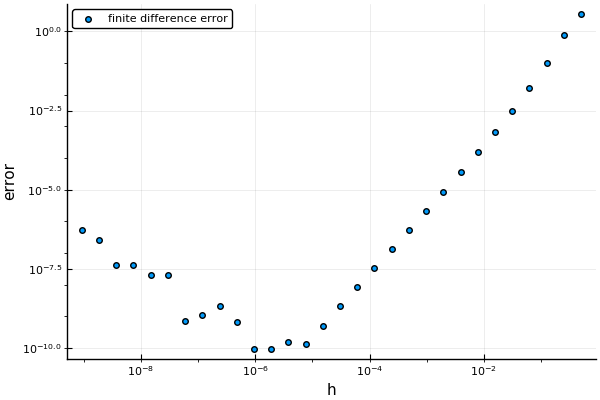

In [44]:
## Solution to 1.3

function approximate_derivative(h)
    
    f_1 = sin(exp(1))
    f_1_h = sin(exp(1+h))
    f_2_h = sin(exp(1+2*h))
    return (-f_2_h + 4*f_1_h -3*f_1)/(2*h)
end


function plot_values()
    
    term_count = 30
    hs = zeros(term_count)
    results = zeros(term_count)
    errors = zeros(term_count)
    
    for i=1:30
        h = 2.0^-i
        hs[i] = h
        results[i] = approximate_derivative(h)
    end
    
    errors = abs.(results .- exp(1)*cos(exp(1)))
    
    scatter(hs, errors, yscale=:log10, xscale=:log10, xlabel="h", ylabel="error", label="finite difference error")
     
end

plot_values()


In [53]:
## Solution to 1.4

dual_x = Dual(1,1)


f(x) = sin(exp(x))

y = f(dual_x)

# Print differential of x
println(dualpart(y))

# Within machine precision if these are equal, evaluations to zero
println(dualpart(y) - exp(1)*cos(exp(1)))

-2.478349732955235
0.0


## Question 2: Finding roots

**1)** Referring to the function, $f(x)$, defined above, find the roots of the equation

$$ f(x) = 0$$

in the interval $0<x<2$.

**2)** Implement the bracketing and bisection method to find one of the roots numerically. Measure the error at each iteration of the algorithm and demonstrate that the error decreases exponentially as a function of the number of iterations. To how many digits of precision can you approximate the root?

**3)** Perform the same measurements for the Newton Raphson method and show that the error decreases faster than exponentially as a function of the number of iterations.

### Solution to 2.1

$$ sin(e^x) == 0$$

$$ x = ln(k \pi) \quad \forall k\in [0,1,2,...]$$

In the interval $0 < x < 2$

$$ x= 1.145 \, , \, x = 1.837 $$


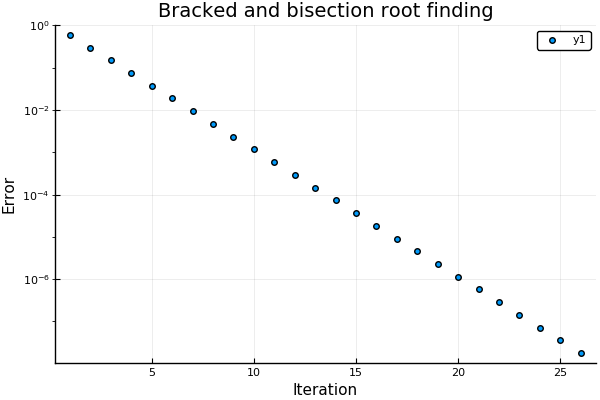

In [18]:
# Solution to 1.3 
function bracket_and_bisect(a,b)
    
    f_a = sin(exp(a))
    f_b = sin(exp(b))
    
    if f_a * f_b > 0
        println("Not a valid bracket")
        return Nothing()
    end
    
    errors = Float64[]
    
    while abs(b-a) > 0.00000001
        append!(errors, abs(b-a))
        
        c = (b+a)/2
        f_c = sin(exp(c))
        
        if f_a * f_c < 0
            a,b = a,c
            f_a, f_b = f_a, f_c 
        else
            a,b = c,b
            f_a,f_b = f_c,f_b
        end
    end
    
    scatter(1:length(errors), errors, yscale=:log10, xlabel="Iteration", ylabel="Error", title="Bracked and bisection root finding")
    
end

bracket_and_bisect(1.3,1.9)

In [ ]:
# Solution to 2.3

function newton_rhapson(x0)
    
    f_0 = sin(exp(x0))
end


## Question 3: Finding minima

**1)** The function $f(x)$ above has a single minimum in the interval $0<x<2$. Find its location analytically.

**2)** Implement the Golden section search to find the location of this minimum numerically. Plot the error as a function of the number of iterations. To how many digits of precision can you approximate the location of the minimum?

**3)** To understand your empirical findings, use Taylor's Theorem to show that near a minimum, $x_*$, of f(x),

$$f(x) \approx f(x_*)\left( 1+ \frac{f^{\prime\prime}(x_*)}{2\,f(x_*)}\,(x-x_*)^2\right). $$
Show that in order for a computer to distinguish between $f(x)$ and $f(x_*)$ we must have

$$ \left| x-x_*\right| > \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x_*)}{f^{\prime\prime}(x_*)}\right|}$$

thus limiting the precision with which the location of a minimum can be determined.